In [ ]:
import tensorflow as tf
import os
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

pd.set_option('display.max_rows',1000)

In [ ]:
df = pd.read_csv('Paint_Data_Merged.csv')
df = df.drop(['Unnamed: 0'], axis=1)
df.head(30)

In [3]:
df.index = pd.to_datetime(df['time'], format='%Y.%m.%d %H:%M:%S')

In [4]:
df['metric'].unique()

array(['E_C100', 'E_C1000', 'E_C1100', 'E_C1200', 'E_C200', 'E_C300',
       'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800'], dtype=object)

In [5]:
meters = ['E_C100', 'E_C200', 'E_C300', 'E_C400', 'E_C500', 'E_C600', 'E_C700', 'E_C800']

In [6]:
def df_to_X_y_multivar(df, X_start = [], y_start = [], window_size = 10):
    df_as_np= df.to_numpy()
    for i in range(len(df_as_np)-window_size):
        row = [r for r in df_as_np[i:i+window_size]]
        X.append(row)
        label = df_as_np[i+window_size][0]
        y.append(label)
    return X, y 

In [7]:
df

,metric,value,time,is_prod,count
time,,,,,
2022-04-15 00:00:00,E_C100,390.0,2022-04-15 00:00:00,0.0,0.0
2022-04-15 01:00:00,E_C100,120.0,2022-04-15 01:00:00,0.0,0.0
2022-04-15 02:00:00,E_C100,120.0,2022-04-15 02:00:00,0.0,0.0
2022-04-15 03:00:00,E_C100,120.0,2022-04-15 03:00:00,0.0,0.0
2022-04-15 04:00:00,E_C100,110.0,2022-04-15 04:00:00,0.0,0.0
...,...,...,...,...,...
2022-06-29 06:00:00,E_C800,300.0,2022-06-29 06:00:00,0.0,63.0
2022-06-29 07:00:00,E_C800,310.0,2022-06-29 07:00:00,1.0,71.0
2022-06-29 08:00:00,E_C800,300.0,2022-06-29 08:00:00,1.0,56.0


In [8]:
#from sklearn import preprocessing
#min_max_scaler = preprocessing.MinMaxScaler()
#x_scaled = min_max_scaler.fit_transform(df['value'])

In [9]:
usage_df = df

usage_df['Seconds'] = df.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df['Day sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Day cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/day))
usage_df['Year sin'] = np.sin(usage_df['Seconds'] * (2*np.pi/year))
usage_df['Year cos'] = np.cos(usage_df['Seconds'] * (2*np.pi/year))

usage_df = usage_df.drop(['Seconds'], axis =1)
usage_df = usage_df.loc[usage_df['metric'].isin(meters)]

usage_df = pd.get_dummies(usage_df, columns=['metric'])
usage_df = usage_df.drop(['time'], axis = 1)

In [10]:
usage_df

,value,is_prod,count,Day sin,Day cos,Year sin,Year cos,metric_E_C100,metric_E_C200,metric_E_C300,metric_E_C400,metric_E_C500,metric_E_C600,metric_E_C700,metric_E_C800
time,,,,,,,,,,,,,,,
2022-04-15 00:00:00,390.0,0.0,0.0,-1.271365e-11,1.000000e+00,0.974794,-0.223108,1,0,0,0,0,0,0,0
2022-04-15 01:00:00,120.0,0.0,0.0,2.588190e-01,9.659258e-01,0.974634,-0.223807,1,0,0,0,0,0,0,0
2022-04-15 02:00:00,120.0,0.0,0.0,5.000000e-01,8.660254e-01,0.974473,-0.224505,1,0,0,0,0,0,0,0
2022-04-15 03:00:00,120.0,0.0,0.0,7.071068e-01,7.071068e-01,0.974312,-0.225204,1,0,0,0,0,0,0,0
2022-04-15 04:00:00,110.0,0.0,0.0,8.660254e-01,5.000000e-01,0.974150,-0.225902,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 06:00:00,300.0,0.0,63.0,1.000000e+00,1.302874e-11,0.051263,-0.998685,0,0,0,0,0,0,0,1
2022-06-29 07:00:00,310.0,1.0,71.0,9.659258e-01,-2.588190e-01,0.050547,-0.998722,0,0,0,0,0,0,0,1
2022-06-29 08:00:00,300.0,1.0,56.0,8.660254e-01,-5.000000e-01,0.049832,-0.998758,0,0,0,0,0,0,0,1


In [11]:
metric_cols = ['metric_E_C100','metric_E_C200','metric_E_C300','metric_E_C400','metric_E_C500','metric_E_C600','metric_E_C700','metric_E_C800']
WINDOW_SIZE= 24
X = []
y = []

for meter in metric_cols:
    df_subset = usage_df.loc[usage_df[meter]==1].copy()
    
    X, y= df_to_X_y_multivar(df_subset, X, y, WINDOW_SIZE) 

    print(len(X))
X = np.array(X)
y = np.array(y)

    

1787
3574
5361
7148
8935
10722
12509
14296


In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

usage_training_mean = np.mean(X_train[:,:,0])
usage_training_std = np.std(X_train[:,:,0])

print('mean: ',usage_training_mean )
print('std: ',usage_training_std )

def preprocess(X_temp):
    X_temp[:,:,0] = (X_temp[:,:,0] - usage_training_mean) / usage_training_std
    return X_temp

def preprocess_output(y_temp):
    y_temp = (y_temp - usage_training_mean) / usage_training_std
    return y_temp

def postprocess_output(y_temp):
    y_temp = (y_temp* usage_training_std ) + usage_training_mean
    return y_temp


pp_X_train = preprocess(X_train)
pp_y_train = preprocess_output(y_train)

pp_X_test = preprocess(X_test)
pp_y_test = preprocess_output(y_test)

mean:  361.1588040690218
std:  299.8906283956299


In [13]:
usage_training_mean

361.1588040690218

In [14]:
 
test = np.array([1060, 1040, 1040])    


test = preprocess_output(test)


(test* usage_training_std ) + usage_training_mean

array([1060., 1040., 1040.])

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam

#model2 = Sequential()
#model2.add(InputLayer((WINDOW_SIZE, 15)))
#model2.add(GRU(64))
#model2.add(Dense(8,'relu'))
#model2.add(Dense(1,'linear'))

#model2.summary()



model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='swish', input_shape=(WINDOW_SIZE, 15)))
model.add(LSTM(128, return_sequences=True, activation='swish'))
model.add(LSTM(64, return_sequences=False, activation='swish'))
model.add(Dense(64, activation='swish'))
model.add(Dense(32, activation='swish'))
model.add(Dense(1,'linear'))

model.summary()

2022-07-19 15:23:21.316331: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-07-19 15:23:21.316458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory
2022-07-19 15:23:21.316538: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory
2022-07-19 15:23:21.316614: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcufft.so.10'; dlerror: libcufft.so.10: cannot open shared object file: No such file or directory
2022-07-19 15:23:21.316689: W tensorflow/stream_executor/platform/default/dso_loader.cc:64

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 64)            20480     
                                                                 
 lstm_1 (LSTM)               (None, 24, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 174,977
Trainable params: 174,977
Non-trai

In [16]:
model.compile(loss=MeanSquaredError(), optimizer=Adam(learning_rate=0.001), metrics=[RootMeanSquaredError()])

In [17]:
model.fit(pp_X_train, pp_y_train, validation_data=(pp_X_test, pp_y_test), epochs=(15))

Epoch 1/15
358/358 [==============================] - 18s 42ms/step - loss: 2.4238 - root_mean_squared_error: 1.5568 - val_loss: 0.3692 - val_root_mean_squared_error: 0.6076
Epoch 2/15
358/358 [==============================] - 15s 43ms/step - loss: 0.3139 - root_mean_squared_error: 0.5602 - val_loss: 0.2181 - val_root_mean_squared_error: 0.4670
Epoch 3/15
358/358 [==============================] - 15s 43ms/step - loss: 0.1992 - root_mean_squared_error: 0.4463 - val_loss: 0.1664 - val_root_mean_squared_error: 0.4079
Epoch 4/15
358/358 [==============================] - 15s 43ms/step - loss: 0.1554 - root_mean_squared_error: 0.3942 - val_loss: 0.1778 - val_root_mean_squared_error: 0.4217
Epoch 5/15
358/358 [==============================] - 15s 42ms/step - loss: 0.1302 - root_mean_squared_error: 0.3609 - val_loss: 0.1283 - val_root_mean_squared_error: 0.3582
Epoch 6/15
358/358 [==============================] - 15s 42ms/step - loss: 0.1114 - root_mean_squared_error: 0.3337 - val_loss: 0

In [ ]:
pp_X_test.shape

In [ ]:
test_predictions = model.predict(pp_X_test).flatten()
test_results=pd.DataFrame(data={'Test Predictions':postprocess_output(test_predictions), 'Actuals': y_test})
test_results.head(100)

In [ ]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, postprocess_output(test_predictions), squared=False)

In [ ]:
test_predictions

In [ ]:
train_predictions = model.predict(preprocess(X)).flatten()
train_results=pd.DataFrame(data={'Train Predictions':postprocess_output(train_predictions), 'Actuals': y})
train_results.head(100)

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(900,15))
plt.plot(train_results['Train Predictions'])
plt.plot(train_results['Actuals'])

<h1>Validation Set and Bootstrapping</h1>

In [24]:
WINDOW_SIZE = 24


df_val = pd.read_csv('Val_Paint_Data_Merged.csv')
df_val = df_val.drop(['Unnamed: 0'], axis=1)
df_val.index = pd.to_datetime(df_val['time'], format='%Y.%m.%d %H:%M:%S')
df_val.head(30)

usage_df_val = df_val

usage_df_val['Seconds'] = df_val.index.map(pd.Timestamp.timestamp)

day = 60*60*24
year=day *365.2425

usage_df_val['Day sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Day cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/day))
usage_df_val['Year sin'] = np.sin(usage_df_val['Seconds'] * (2*np.pi/year))
usage_df_val['Year cos'] = np.cos(usage_df_val['Seconds'] * (2*np.pi/year))

usage_df_val = usage_df_val.drop(['Seconds'], axis =1)
usage_df_val = usage_df_val.loc[usage_df_val['metric'].isin(meters)]

usage_df_val = pd.get_dummies(usage_df_val, columns=['metric'])
usage_df_val = usage_df_val.drop(['time'], axis = 1)

preds = []
acts = []

start_point = 100

for i in range(24*7):
    bootstrap_x = np.expand_dims(usage_df_val.to_numpy()[i + start_point :i + start_point +WINDOW_SIZE], 0)
    #print(bootstrap_x)
    pred_y = postprocess_output(model.predict(preprocess(bootstrap_x)))[0][0]
    act_y = usage_df_val.to_numpy()[start_point + i+WINDOW_SIZE][0]
    usage_df_val.iloc[start_point + i+WINDOW_SIZE, 0] = pred_y
    
    preds.append(pred_y)
    acts.append(act_y)
    
    
    #print(pred_y)
    #print(act_y)
    #print('--------')

1/1 [==============================] - 0s 19ms/step


1/1 [==============================] - 0s 19ms/step


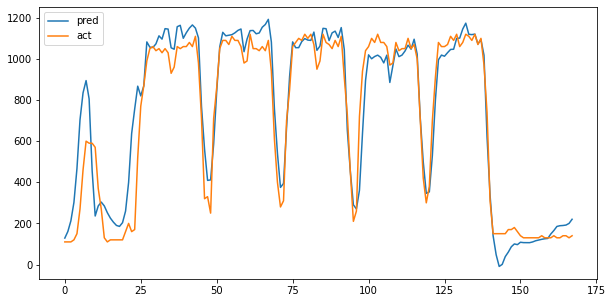

In [25]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")


In [26]:
from sklearn.metrics import mean_squared_error
mean_squared_error(acts, preds, squared=False)

123.57385705157611

In [ ]:
import matplotlib.pyplot as plt

val_results=pd.DataFrame(data={'Train Predictions':preds, 'Actuals': acts})


plt.figure(figsize=(10,5))
plt.plot(val_results['Train Predictions'], label='pred')
plt.plot(val_results['Actuals'], label='act')
plt.legend(loc="upper left")
